In [193]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler , MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,roc_auc_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV, cross_val_predict, StratifiedKFold

In [194]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [195]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization, ReLU,Input,Dropout,Conv2D,MaxPooling2D,Flatten,Conv1D

In [196]:
from scikeras.wrappers import KerasClassifier    #for scikit wrapper
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [197]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

In [198]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Data Preprocessing 

In [199]:
df = pd.read_csv('Merged Data Angle Force (Last 20 stable).csv')
print(df.head(10))

   Thumb  Index  Middle  Ring  Pinky  Right Thumb [N]  Right Index [N]  \
0   20.0  102.0   132.0  74.0   59.0            0.290           -0.043   
1   22.0  102.0   132.0  74.0   59.0            0.284           -0.023   
2   22.0  102.0   132.0  74.0   59.0            0.294           -0.012   
3   22.0  104.0   133.0  74.0   59.0            0.284           -0.012   
4   21.0  103.0   134.0  74.0   59.0            0.288           -0.004   
5   22.0  103.0   134.0  74.0   59.0            0.288           -0.008   
6   22.0  102.0   132.0  74.0   59.0            0.290           -0.008   
7   22.0  103.0   130.0  74.0   59.0            0.195            0.059   
8   25.0  101.0   130.0  74.0   59.0            0.191           -0.008   
9   22.0  101.0   129.0  73.0   59.0            0.191            0.059   

   Right Middle [N]  Right Ring [N]  Right Pinky [N]             Object Grasp  \
0             0.141          -0.164            0.948  Skillet lid (T01)  Hook   
1             0.133    

In [200]:
newdf = df[['Thumb','Index','Middle','Ring','Pinky','Grasp','Object']]
newdf

,Thumb,Index,Middle,Ring,Pinky,Grasp,Object
0,20.0,102.0,132.0,74.0,59.0,Hook,Skillet lid (T01)
1,22.0,102.0,132.0,74.0,59.0,Hook,Skillet lid (T01)
2,22.0,102.0,132.0,74.0,59.0,Hook,Skillet lid (T01)
3,22.0,104.0,133.0,74.0,59.0,Hook,Skillet lid (T01)
4,21.0,103.0,134.0,74.0,59.0,Hook,Skillet lid (T01)
...,...,...,...,...,...,...,...
4795,23.0,37.0,35.0,29.0,12.0,Pulp Pinch (PP),Washer (T26)
4796,23.0,37.0,34.0,29.0,12.0,Pulp Pinch (PP),Washer (T26)
4797,22.0,37.0,35.0,30.0,12.0,Pulp Pinch (PP),Washer (T26)
4798,23.0,37.0,35.0,29.0,12.0,Pulp Pinch (PP),Washer (T26)


In [201]:
newdf.Object.value_counts().size

24

In [202]:
grasp_object_counts = newdf.groupby(['Grasp', 'Object']).size()

# Display the result
print(grasp_object_counts)

Grasp                       Object                
 Diagonal Volar Grip (DVG)  Screwdriver (T06)         200
                            Skillet (T24)             200
                            Spatula (T15)             200
Cylindrical Grip (CG)       Chips Can (T05)           200
                            Coffee Can (T14)          200
                            Power Drill (T23)         200
Extension Grip (EG)         Craker Box (T13)          200
                            Plate (T04)               200
                            Tetra Pack (T22)          200
Hook                        Coffee Cup (T19)          200
                            Pitcher base (T10)        200
                            Skillet lid (T01)         200
Lateral Pinch (LP)          Bowl (T07)                200
                            Key (T25)                 200
                            XS Clamp (T16)            200
Pulp Pinch (PP)             Plastic Peer (T17)        200
                     

In [203]:
#test_objects = ['Spatula (T15)','Coffee Can (T14)','Tetra Pack (T22)','Skillet lid (T01)','Key (T25)','Small Marker (T08)','Mini Soccer ball (T11)','Large Marker (T03)']
#len(test_objects)

In [204]:
# print(newdf.shape)
# training_data = newdf[~newdf['Object'].isin(test_objects)]
# test_data = newdf[newdf['Object'].isin(test_objects)]
# print(training_data.shape)
# print(test_data.shape)

In [205]:
# trainy = training_data.Grasp
# trainx = training_data.drop("Grasp",axis='columns')
# testy = test_data.Grasp
# testx = test_data.drop("Grasp",axis='columns')
# print(trainx)
# print(trainy)

In [206]:
y= newdf.Grasp
x= newdf.drop("Grasp",axis='columns')
print(x)
print(y)
print(x.loc[2140:2150])
x.loc[2140] = [26.0,57,75,44,30,"Tuna Can (T12)"]
print(x.loc[2140:2150])
print(type(x))

      Thumb  Index  Middle  Ring  Pinky             Object
0      20.0  102.0   132.0  74.0   59.0  Skillet lid (T01)
1      22.0  102.0   132.0  74.0   59.0  Skillet lid (T01)
2      22.0  102.0   132.0  74.0   59.0  Skillet lid (T01)
3      22.0  104.0   133.0  74.0   59.0  Skillet lid (T01)
4      21.0  103.0   134.0  74.0   59.0  Skillet lid (T01)
...     ...    ...     ...   ...    ...                ...
4795   23.0   37.0    35.0  29.0   12.0      Washer (T26) 
4796   23.0   37.0    34.0  29.0   12.0      Washer (T26) 
4797   22.0   37.0    35.0  30.0   12.0      Washer (T26) 
4798   23.0   37.0    35.0  29.0   12.0      Washer (T26) 
4799   23.0   40.0    35.0  29.0   13.0      Washer (T26) 

[4800 rows x 6 columns]
0                  Hook
1                  Hook
2                  Hook
3                  Hook
4                  Hook
             ...       
4795    Pulp Pinch (PP)
4796    Pulp Pinch (PP)
4797    Pulp Pinch (PP)
4798    Pulp Pinch (PP)
4799    Pulp Pinch (PP)
Nam

In [207]:
def preprocess_xy(x,y):
    x= x.drop("Object",axis='columns')
    frames = 20
    num_samples = (len(newdf))//frames
    x = x.values.reshape(num_samples, frames, x.shape[1])
    y=y.iloc[::frames]    #slicing y
    #y = pd.get_dummies(y).to_numpy()
    encode = LabelEncoder()   
    trainx,testx,trainy,testy = train_test_split(x,y,random_state=0,test_size=0.3)   #automatically shuffles
    trainy = encode.fit_transform(trainy)
    testy = encode.transform(testy)
    re_trainx = trainx.reshape(trainx.shape[0]*trainx.shape[1],trainx.shape[2])
    #re_trainx.shape
    re_testx = testx.reshape(testx.shape[0]*testx.shape[1],testx.shape[2])
    #re_testx.shape
    scaler = StandardScaler()
    re_trainx = scaler.fit_transform(re_trainx)
    re_testx = scaler.transform(re_testx)
    trainx = re_trainx.reshape(-1, frames*trainx.shape[2])
    testx = re_testx.reshape(-1, frames*testx.shape[2])
    return trainx,testx,trainy,testy
trainx,testx,trainy_label,testy_label = preprocess_xy(x,y)

In [98]:
def person_preprocess_xy(x,y):
    x= x.drop("Object",axis='columns')
    x= x.values.reshape(240,100)
    x= pd.DataFrame(x)
    y= y.iloc[::20]
    rows_to_move = pd.concat([x.iloc[7::10],x.iloc[8::10], x.iloc[9::10]])
    trainx = x.drop(rows_to_move.index)
    testx = rows_to_move.reset_index(drop=True)
    rows_to_move = pd.concat([y.iloc[7::10],y.iloc[8::10], y.iloc[9::10]])
    trainy = y.drop(rows_to_move.index)
    testy = rows_to_move.reset_index(drop=True)
    encode = LabelEncoder()
    trainy = encode.fit_transform(trainy)
    testy = encode.transform(testy)
    scaler = StandardScaler()
    trainx = scaler.fit_transform(trainx)
    testx = scaler.transform(testx)
    trainx, trainy = shuffle(trainx, trainy, random_state=42)   #for shuffling
    testx, testy = shuffle(testx, testy, random_state=42)     #for shuffling
    return trainx,testx,trainy,testy
trainx,testx,trainy_label,testy_label = person_preprocess_xy(x,y)

In [208]:
def process_xy(x,y):    #this has to be used for cross_validation scores
    x= x.drop("Object",axis='columns')
    x= x.values.reshape(240,100)
    x= pd.DataFrame(x)
    y= y.iloc[::20]
    encode = LabelEncoder()
    y = encode.fit_transform(y)
    return x,y
x,y = process_xy(x,y)

In [209]:
print(x)
print(y)

       0      1      2     3     4     5      6      7     8     9   ...  \
0    20.0  102.0  132.0  74.0  59.0  22.0  102.0  132.0  74.0  59.0  ...   
1    34.0  101.0  141.0  83.0  50.0  36.0   98.0  140.0  83.0  50.0  ...   
2    33.0   99.0  134.0  76.0  51.0  33.0   98.0  133.0  76.0  50.0  ...   
3    31.0   97.0  134.0  79.0  53.0  32.0   97.0  134.0  78.0  52.0  ...   
4    28.0   99.0  142.0  81.0  61.0  28.0   99.0  138.0  80.0  61.0  ...   
..    ...    ...    ...   ...   ...   ...    ...    ...   ...   ...  ...   
235  22.0   31.0   36.0  26.0  17.0  22.0   35.0   36.0  26.0  17.0  ...   
236  22.0   32.0   31.0  23.0  17.0  22.0   32.0   31.0  24.0  17.0  ...   
237  19.0   35.0   40.0  31.0  15.0  19.0   35.0   40.0  30.0  15.0  ...   
238  20.0   27.0   36.0  33.0  19.0  19.0   28.0   39.0  33.0  19.0  ...   
239  22.0   37.0   36.0  29.0  12.0  23.0   37.0   35.0  30.0  12.0  ...   

       90     91     92    93    94    95     96     97    98    99  
0    22.0  102.0 

In [210]:
print(testy_label.shape)
print(trainx.shape)
print(type(testx))
print(testy_label)

(72,)
(168, 100)
<class 'numpy.ndarray'>
[7 5 2 5 7 4 5 4 5 2 5 1 3 5 5 0 7 2 4 3 7 6 3 1 3 7 2 6 6 3 0 1 4 1 4 2 4
 6 4 6 5 1 0 6 7 6 7 3 2 5 4 5 5 0 6 2 5 5 2 3 5 0 6 5 1 5 6 0 1 5 3 7]


# SVM

In [211]:
for kernel in ['rbf','linear','poly']:
    for C in [1,10,100,1000]:
        if(kernel!='poly'):
            model = SVC(kernel=kernel,C=C)
            model.fit(trainx,trainy_label)
            print("Training set score for SVM: %f" % model.score(trainx, trainy_label))
            print("Testing  set score for SVM: %f" % model.score(testx, testy_label))
        else:
            for degree in [2,3,4,5]:
                model = SVC(kernel=kernel,C=C,degree=degree)
                model.fit(trainx,trainy_label)
                print("Training set score for SVM: %f" % model.score(trainx, trainy_label))
                print("Testing  set score for SVM: %f" % model.score(testx, testy_label))
        print('&&----------------------------&&',kernel,C)

Training set score for SVM: 0.857143
Testing  set score for SVM: 0.833333
&&----------------------------&& rbf 1
Training set score for SVM: 0.964286
Testing  set score for SVM: 0.888889
&&----------------------------&& rbf 10
Training set score for SVM: 0.994048
Testing  set score for SVM: 0.916667
&&----------------------------&& rbf 100
Training set score for SVM: 1.000000
Testing  set score for SVM: 0.888889
&&----------------------------&& rbf 1000
Training set score for SVM: 0.934524
Testing  set score for SVM: 0.916667
&&----------------------------&& linear 1
Training set score for SVM: 0.964286
Testing  set score for SVM: 0.930556
&&----------------------------&& linear 10
Training set score for SVM: 0.994048
Testing  set score for SVM: 0.861111
&&----------------------------&& linear 100
Training set score for SVM: 1.000000
Testing  set score for SVM: 0.847222
&&----------------------------&& linear 1000
Training set score for SVM: 0.702381
Testing  set score for SVM: 0.69444

In [212]:
param_grid_svm = [
                {'kernel': ['rbf'], 'C': [250,500, 1000,2000,3000,5000,7000,10000]},
                #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                #{'kernel': ['poly'], 'C': [1,10,100,1000], 'degree':[2,3,4,5]}
                 ]

In [213]:
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=1,n_jobs=-1) #shuffle=false by default here

In [214]:
grid_search_svm.fit(trainx,trainy_label)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [250, 500, 1000, 2000, 3000, 5000, 7000, 10000],
                          'kernel': ['rbf']}],
             verbose=1)

In [215]:
#View the accuracy score
print('Best score for training data:', grid_search_svm.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',grid_search_svm.best_estimator_.C,"\n") 
print('Best Kernel:',grid_search_svm.best_estimator_.kernel,"\n")
print('Best Gamma:',grid_search_svm.best_estimator_.gamma,"\n")

Best score for training data: 0.8688057040998217 

Best C: 250 

Best Kernel: rbf 

Best Gamma: scale 



In [216]:
best_index = grid_search_svm.best_index_
mean_accuracy = grid_search_svm.cv_results_['mean_test_score'][best_index]
std_accuracy = grid_search_svm.cv_results_['std_test_score'][best_index]

print(f"Best Model Accuracy (mean): {mean_accuracy:.4f}")    
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
#it improved a lot after shuffling because we had passed cv=5 in the GridSearchCV. means cv used KFold with shuffle=False.

Best Model Accuracy (mean): 0.8688
Standard Deviation of Accuracy: 0.0249


In [217]:
svm_final_model = grid_search_svm.best_estimator_
predictedy = svm_final_model.predict(testx)

In [218]:
svm_train_score = svm_final_model.score(trainx, trainy_label)
svm_test_score = svm_final_model.score(testx, testy_label)
print("Training set score for SVM: %f" % svm_final_model.score(trainx, trainy_label))
print("Testing  set score for SVM: %f" % svm_final_model.score(testx, testy_label))

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.902778


In [219]:
print(confusion_matrix(testy_label,predictedy))

[[ 4  0  0  2  0  0  0  0]
 [ 0  7  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1]
 [ 0  0  0  8  0  0  0  0]
 [ 1  0  1  0  6  0  0  0]
 [ 0  0  0  0  0 16  0  1]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  8]]


In [220]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', svm_final_model)
])
#we use this pipeline instead of directly using the svm_final_model because the pipeline automatically 
#scales whichever training data has been passed in that fold.
#we cannot scale x and y before instead because it results in data leakage.

In [221]:
# "cv" argument takes a splitting strategy like Kfold or StratifiedKfold for splitting the data.
# when we write cv=5, it is a shorthand for using Kfold with default parameters and n_splits=5.
# this Kfold with default parameters has Shuffle=False.
# So for shuffling while splitting, we pass a Kfold with Shuffle=True as the cv argument.
y_pred = cross_val_predict(pipeline, x, y, cv= KFold(n_splits=5, shuffle=True, random_state=42))
#cross_val_predict returns the predicted labels or values for each sample in the dataset as if it were part of the test set in cross-validation.

In [222]:
# KFold is a cross-validator that divides the dataset into k folds.
# Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.
# we should prefer StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

# but since here we have equal samples of each class, maybe we don't really need StratifiedKFold.

[[22  0  0  5  3  0  0  0]
 [ 0 27  1  0  0  0  2  0]
 [ 0  1 28  0  1  0  0  0]
 [ 3  0  0 27  0  0  0  0]
 [ 2  0  1  1 26  0  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  1  3  0  0  1  0 25]]


Text(50.722222222222214, 0.5, 'True grasp type')

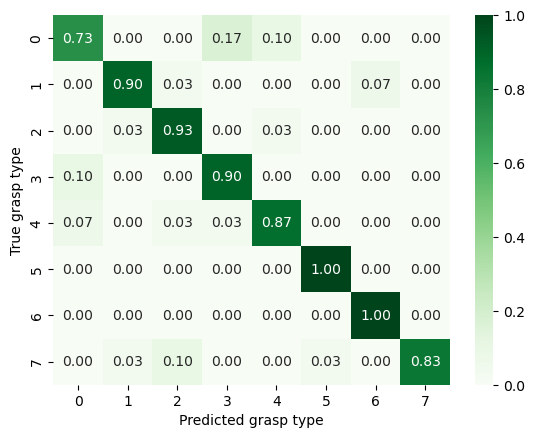

In [223]:
print(confusion_matrix(y,y_pred))
sns.heatmap(data=(confusion_matrix(y,y_pred)/30), annot=True, fmt=".2f", cmap='Greens')
plt.xlabel('Predicted grasp type')
plt.ylabel('True grasp type')

# Decision tree

In [224]:
for criterion in ['gini', 'entropy','log_loss']:
    for max_depth in [3, 5, 10, None]:
        model = DecisionTreeClassifier(random_state=42,criterion=criterion,max_depth=max_depth)
        model.fit(trainx,trainy_label)
        print("Training set score for DT: %f" % model.score(trainx, trainy_label))
        print("Testing  set score for Dt: %f" % model.score(testx, testy_label))       
        print('&&----------------------------&&',criterion,max_depth)

Training set score for DT: 0.654762
Testing  set score for Dt: 0.458333
&&----------------------------&& gini 3
Training set score for DT: 0.952381
Testing  set score for Dt: 0.861111
&&----------------------------&& gini 5
Training set score for DT: 1.000000
Testing  set score for Dt: 0.861111
&&----------------------------&& gini 10
Training set score for DT: 1.000000
Testing  set score for Dt: 0.861111
&&----------------------------&& gini None
Training set score for DT: 0.702381
Testing  set score for Dt: 0.736111
&&----------------------------&& entropy 3
Training set score for DT: 0.940476
Testing  set score for Dt: 0.833333
&&----------------------------&& entropy 5
Training set score for DT: 1.000000
Testing  set score for Dt: 0.791667
&&----------------------------&& entropy 10
Training set score for DT: 1.000000
Testing  set score for Dt: 0.791667
&&----------------------------&& entropy None
Training set score for DT: 0.702381
Testing  set score for Dt: 0.736111
&&----------

In [225]:
param_grid_dt = {
    'criterion': ['gini', 'entropy','log_loss'],     # Try both 'gini' and 'entropy'
    'max_depth': [None],        # Try different values of max_depth
    'min_samples_split': [2, 5, 10],      # Varying minimum samples required to split an internal node, default = 2
    'min_samples_leaf': [1, 2, 4],        # Varying minimum samples required to be at a leaf node, default = 1
}

In [226]:
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, verbose=1, n_jobs=-1)

In [227]:
grid_search_dt.fit(trainx,trainy_label)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [228]:
# View the accuracy score
print('Best score for training data:', grid_search_dt.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best criterion:',grid_search_dt.best_estimator_.criterion,"\n") 
print('Best max_depth:',grid_search_dt.best_estimator_.max_depth,"\n")
print('Best min_samples_split:',grid_search_dt.best_estimator_.min_samples_split,"\n") 
print('Best min_samples_leaf:',grid_search_dt.best_estimator_.min_samples_leaf,"\n")

Best score for training data: 0.8210338680926916 

Best criterion: entropy 

Best max_depth: None 

Best min_samples_split: 5 

Best min_samples_leaf: 1 



In [229]:
best_index = grid_search_dt.best_index_
mean_accuracy = grid_search_dt.cv_results_['mean_test_score'][best_index]
std_accuracy = grid_search_dt.cv_results_['std_test_score'][best_index]

print(f"Best Model Accuracy (mean): {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Best Model Accuracy (mean): 0.8210
Standard Deviation of Accuracy: 0.0437


In [230]:
dt_final_model = grid_search_dt.best_estimator_
predictedy = dt_final_model.predict(testx)
dt_train_score = dt_final_model.score(trainx, trainy_label)
dt_test_score = dt_final_model.score(testx, testy_label)
print("Training set score for dt: %f" % dt_train_score)
print("Testing  set score for dt: %f" % dt_test_score)
print(confusion_matrix(testy_label,predictedy))

Training set score for dt: 0.982143
Testing  set score for dt: 0.847222
[[ 6  0  0  0  0  0  0  0]
 [ 0  6  1  0  0  0  0  0]
 [ 0  0  5  0  0  1  0  2]
 [ 1  0  0  7  0  0  0  0]
 [ 2  0  0  0  6  0  0  0]
 [ 0  0  0  0  0 16  0  1]
 [ 0  0  0  0  0  0 10  0]
 [ 0  3  0  0  0  0  0  5]]


[[26  0  0  2  2  0  0  0]
 [ 0 29  0  0  0  0  1  0]
 [ 0  4 24  0  0  0  0  2]
 [ 5  0  0 24  1  0  0  0]
 [ 7  0  2  3 18  0  0  0]
 [ 0  0  0  0  0 26  0  4]
 [ 0  0  0  0  1  0 29  0]
 [ 0  3  2  0  0  1  0 24]]


Text(50.722222222222214, 0.5, 'True grasp type')

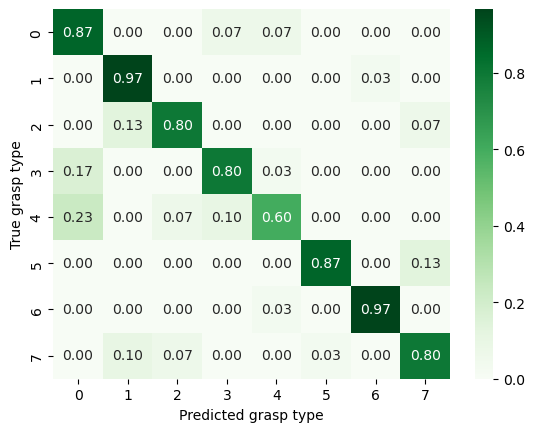

In [231]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', dt_final_model)
])
y_pred = cross_val_predict(pipeline, x, y, cv= KFold(n_splits=5, shuffle=True, random_state=42))
print(confusion_matrix(y,y_pred))
sns.heatmap(data=(confusion_matrix(y,y_pred)/30), annot=True, fmt=".2f", cmap='Greens')
plt.xlabel('Predicted grasp type')
plt.ylabel('True grasp type')

# Random Forest

In [232]:
 for criterion in ['gini', 'entropy']: 
    for max_depth in [None, 10, 20, 30]:
        for n_estimators in [50, 100, 200]:
            model = RandomForestClassifier(random_state=42,criterion=criterion,max_depth=max_depth, n_estimators= n_estimators)
            model.fit(trainx,trainy_label)
            print("Training set score for DT: %f" % model.score(trainx, trainy_label))
            print("Testing  set score for Dt: %f" % model.score(testx, testy_label))       
            print('&&----------------------------&&',criterion,max_depth,n_estimators) 

Training set score for DT: 1.000000
Testing  set score for Dt: 0.902778
&&----------------------------&& gini None 50
Training set score for DT: 1.000000
Testing  set score for Dt: 0.875000
&&----------------------------&& gini None 100
Training set score for DT: 1.000000
Testing  set score for Dt: 0.875000
&&----------------------------&& gini None 200
Training set score for DT: 1.000000
Testing  set score for Dt: 0.902778
&&----------------------------&& gini 10 50
Training set score for DT: 1.000000
Testing  set score for Dt: 0.875000
&&----------------------------&& gini 10 100
Training set score for DT: 1.000000
Testing  set score for Dt: 0.875000
&&----------------------------&& gini 10 200
Training set score for DT: 1.000000
Testing  set score for Dt: 0.902778
&&----------------------------&& gini 20 50
Training set score for DT: 1.000000
Testing  set score for Dt: 0.875000
&&----------------------------&& gini 20 100
Training set score for DT: 1.000000
Testing  set score for Dt

In [233]:
# model = RandomForestClassifier(random_state=42,min_samples_leaf=4)
# model.fit(trainx,trainy_label)
# print("Training set score for DT: %f" % model.score(trainx, trainy_label))
# print("Testing  set score for Dt: %f" % model.score(testx, testy_label))

In [234]:
param_grid_rf = {
    'n_estimators': [70, 100, 150],      # Number of trees in the forest
    'max_depth': [None,30,40,50,70,100],     # Maximum depth of each tree
    'criterion': ['gini', 'entropy']     # Split criterion
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, verbose=0, n_jobs=-1)

In [235]:
grid_search_rf.fit(trainx,trainy_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 30, 40, 50, 70, 100],
                         'n_estimators': [70, 100, 150]})

In [236]:
# View the accuracy score
print('Best score for training data:', grid_search_rf.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best criterion:',grid_search_rf.best_estimator_.criterion,"\n") 
print('Best max_depth:',grid_search_rf.best_estimator_.max_depth,"\n")
print('Best n_estimators:',grid_search_rf.best_estimator_.n_estimators,"\n")

Best score for training data: 0.8449197860962567 

Best criterion: entropy 

Best max_depth: None 

Best n_estimators: 100 



In [237]:
# cv_result=pd.DataFrame(grid_search_rf.cv_results_)
# print(cv_result[['param_criterion', 'param_max_depth', 'param_n_estimators', 
#                  'mean_test_score', 'rank_test_score']])

In [238]:
rf_final_model = grid_search_rf.best_estimator_
predictedy = rf_final_model.predict(testx)
rf_train_score = rf_final_model.score(trainx, trainy_label)
rf_test_score = rf_final_model.score(testx, testy_label)
print("Training set score for rf: %f" % rf_train_score)
print("Testing  set score for rf: %f" % rf_test_score)
print(confusion_matrix(testy_label,predictedy))

Training set score for rf: 1.000000
Testing  set score for rf: 0.861111
[[ 5  0  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  2]
 [ 1  0  0  7  0  0  0  0]
 [ 1  0  0  0  6  0  0  1]
 [ 0  0  0  0  0 16  0  1]
 [ 0  0  0  0  0  0 10  0]
 [ 0  3  0  0  0  0  0  5]]


# KNN

In [239]:
for metric in ['euclidean', 'manhattan']:
    for weights in ['uniform', 'distance']:
        for n_neighbors in [3, 5, 7, 9]:
            model = KNeighborsClassifier(metric=metric,weights=weights, n_neighbors=n_neighbors)
            model.fit(trainx,trainy_label)
            print("Training set score for knn: %f" % model.score(trainx, trainy_label))
            print("Testing  set score for knn: %f" % model.score(testx, testy_label))       
            print('&&----------------------------&&',metric,weights,n_neighbors)

Training set score for knn: 0.916667
Testing  set score for knn: 0.847222
&&----------------------------&& euclidean uniform 3
Training set score for knn: 0.910714
Testing  set score for knn: 0.847222
&&----------------------------&& euclidean uniform 5
Training set score for knn: 0.869048
Testing  set score for knn: 0.791667
&&----------------------------&& euclidean uniform 7
Training set score for knn: 0.851190
Testing  set score for knn: 0.791667
&&----------------------------&& euclidean uniform 9
Training set score for knn: 1.000000
Testing  set score for knn: 0.833333
&&----------------------------&& euclidean distance 3
Training set score for knn: 1.000000
Testing  set score for knn: 0.847222
&&----------------------------&& euclidean distance 5
Training set score for knn: 1.000000
Testing  set score for knn: 0.833333
&&----------------------------&& euclidean distance 7
Training set score for knn: 1.000000
Testing  set score for knn: 0.819444
&&----------------------------&& e

In [240]:
param_grid = {
    'n_neighbors': [1,2, 3, 5],            # Number of neighbors to consider
    'weights': ['uniform', 'distance'],     # Weight function (uniform or distance-based)
    'metric': ['euclidean', 'manhattan']    # Distance metric
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [241]:
grid_search_knn.fit(trainx,trainy_label)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [242]:
# View the accuracy score
print('Best score for training data:', grid_search_knn.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best criterion:',grid_search_knn.best_estimator_.n_neighbors,"\n") 
print('Best max_depth:',grid_search_knn.best_estimator_.weights,"\n")
print('Best n_estimators:',grid_search_knn.best_estimator_.metric,"\n")

Best score for training data: 0.8688057040998217 

Best criterion: 1 

Best max_depth: uniform 

Best n_estimators: manhattan 



In [243]:
knn_final_model = grid_search_knn.best_estimator_
predictedy = knn_final_model.predict(testx)
knn_train_score = knn_final_model.score(trainx, trainy_label)
knn_test_score = knn_final_model.score(testx, testy_label)
print("Training set score for knn: %f" % knn_train_score)
print("Testing  set score for knn: %f" % knn_test_score)
print(confusion_matrix(testy_label,predictedy))

Training set score for knn: 1.000000
Testing  set score for knn: 0.791667
[[ 3  0  0  3  0  0  0  0]
 [ 0  7  0  0  0  0  0  0]
 [ 0  2  6  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0 12  0  5]
 [ 0  0  0  0  0  0 10  0]
 [ 0  5  0  0  0  0  0  3]]


# Logistic Regression

In [244]:
for C in [0.01, 0.1, 1, 10, 100]:
    for penalty in ['l2']:
        for solver in ['newton-cg', 'lbfgs', 'saga']:
            for max_iter in [100, 200, 300]:
                model = LogisticRegression(C=C,penalty=penalty,solver=solver,max_iter=max_iter)
                model.fit(trainx,trainy_label)
                print("Training set score for lr: %f" % model.score(trainx, trainy_label))
                print("Testing  set score for lr: %f" % model.score(testx, testy_label))       
                print('&&----------------------------&&',C,solver,max_iter)

Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 newton-cg 100
Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 newton-cg 200
Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 newton-cg 300
Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 lbfgs 100
Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 lbfgs 200
Training set score for lr: 0.791667
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 lbfgs 300
Training set score for lr: 0.791667
Testing  set score for lr: 0.819444
&&----------------------------&& 0.01 saga 100


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.797619
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 saga 200
Training set score for lr: 0.797619
Testing  set score for lr: 0.833333
&&----------------------------&& 0.01 saga 300
Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 newton-cg 100
Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 newton-cg 200
Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 newton-cg 300
Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 lbfgs 100
Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 lbfgs 200


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.845238
Testing  set score for lr: 0.888889
&&----------------------------&& 0.1 lbfgs 300
Training set score for lr: 0.839286
Testing  set score for lr: 0.833333
&&----------------------------&& 0.1 saga 100


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.863095
Testing  set score for lr: 0.861111
&&----------------------------&& 0.1 saga 200


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score for lr: 0.851190
Testing  set score for lr: 0.861111
&&----------------------------&& 0.1 saga 300
Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 newton-cg 100
Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 newton-cg 200
Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 newton-cg 300
Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 lbfgs 100


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 lbfgs 200
Training set score for lr: 0.898810
Testing  set score for lr: 0.875000
&&----------------------------&& 1 lbfgs 300
Training set score for lr: 0.869048
Testing  set score for lr: 0.833333
&&----------------------------&& 1 saga 100
Training set score for lr: 0.886905
Testing  set score for lr: 0.861111
&&----------------------------&& 1 saga 200


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score for lr: 0.880952
Testing  set score for lr: 0.861111
&&----------------------------&& 1 saga 300
Training set score for lr: 0.940476
Testing  set score for lr: 0.916667
&&----------------------------&& 10 newton-cg 100
Training set score for lr: 0.940476
Testing  set score for lr: 0.916667
&&----------------------------&& 10 newton-cg 200
Training set score for lr: 0.940476
Testing  set score for lr: 0.916667
&&----------------------------&& 10 newton-cg 300
Training set score for lr: 0.940476
Testing  set score for lr: 0.902778
&&----------------------------&& 10 lbfgs 100


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.940476
Testing  set score for lr: 0.916667
&&----------------------------&& 10 lbfgs 200
Training set score for lr: 0.940476
Testing  set score for lr: 0.916667
&&----------------------------&& 10 lbfgs 300
Training set score for lr: 0.886905
Testing  set score for lr: 0.861111
&&----------------------------&& 10 saga 100
Training set score for lr: 0.898810
Testing  set score for lr: 0.861111
&&----------------------------&& 10 saga 200


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.910714
Testing  set score for lr: 0.861111
&&----------------------------&& 10 saga 300
Training set score for lr: 0.982143
Testing  set score for lr: 0.861111
&&----------------------------&& 100 newton-cg 100
Training set score for lr: 0.982143
Testing  set score for lr: 0.861111
&&----------------------------&& 100 newton-cg 200
Training set score for lr: 0.982143
Testing  set score for lr: 0.861111
&&----------------------------&& 100 newton-cg 300


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training set score for lr: 0.946429
Testing  set score for lr: 0.930556
&&----------------------------&& 100 lbfgs 100
Training set score for lr: 0.982143
Testing  set score for lr: 0.847222
&&----------------------------&& 100 lbfgs 200
Training set score for lr: 0.982143
Testing  set score for lr: 0.861111
&&----------------------------&& 100 lbfgs 300


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score for lr: 0.880952
Testing  set score for lr: 0.861111
&&----------------------------&& 100 saga 100
Training set score for lr: 0.898810
Testing  set score for lr: 0.861111
&&----------------------------&& 100 saga 200
Training set score for lr: 0.916667
Testing  set score for lr: 0.861111
&&----------------------------&& 100 saga 300


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [245]:
param_grid = {
    'C': [1, 10, 100],    # Regularization strength (Inverse of regularization)
    'penalty': ['l2'],               # L2 regularization (L1 is not supported with 'multinomial')
    'solver': ['newton-cg', 'lbfgs', 'saga','liblinear','sag'],  # Solvers supporting multinomial classification
    'max_iter': [100, 200, 300]      # Number of iterations for optimization
}
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

In [246]:
grid_search_lr.fit(trainx,trainy_label)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear',
                                    'sag']},
             scoring='accuracy', verbose=1)

In [247]:
# View the accuracy score
print('Best score for training data:', grid_search_lr.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best criterion:',grid_search_lr.best_estimator_.C,"\n") 
print('Best max_depth:',grid_search_lr.best_estimator_.solver,"\n")
print('Best n_estimators:',grid_search_lr.best_estimator_.max_iter,"\n")

Best score for training data: 0.8270944741532977 

Best criterion: 10 

Best max_depth: sag 

Best n_estimators: 100 



Training set score for lr: 0.898810
Testing  set score for lr: 0.861111
[[ 3  0  0  2  1  0  0  0]
 [ 0  7  0  0  0  0  0  0]
 [ 0  0  7  0  0  1  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 2  0  0  0  5  0  0  1]
 [ 0  0  1  0  0 16  0  0]
 [ 0  1  0  0  0  0  9  0]
 [ 0  0  1  0  0  0  0  7]]


<Axes: >

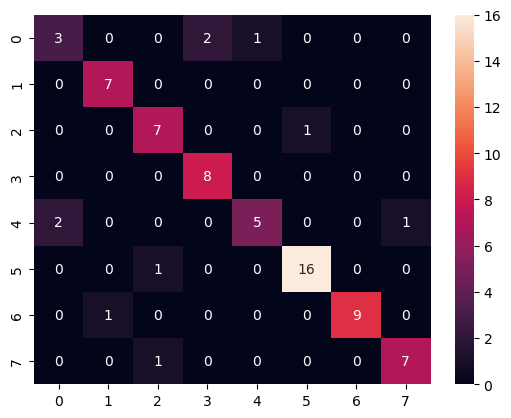

In [248]:
lr_final_model = grid_search_lr.best_estimator_
predictedy = lr_final_model.predict(testx)
lr_train_score = lr_final_model.score(trainx, trainy_label)
lr_test_score = lr_final_model.score(testx, testy_label)
print("Training set score for lr: %f" % lr_train_score)
print("Testing  set score for lr: %f" % lr_test_score)
print(confusion_matrix(testy_label,predictedy))
sns.heatmap(data=(confusion_matrix(testy_label,predictedy)), annot=True)

# Deep Learning

# PLOTS

In [249]:
df = pd.DataFrame({
    'Classifier': ['Decision Tree','Random Forest','SVM','Logistic Regression','KNN'],
    'Training Accuracy': [dt_train_score,rf_train_score,svm_train_score,lr_train_score,knn_train_score],
    'Testing Accuracy': [dt_test_score,rf_test_score,svm_test_score,lr_test_score,knn_test_score]
})

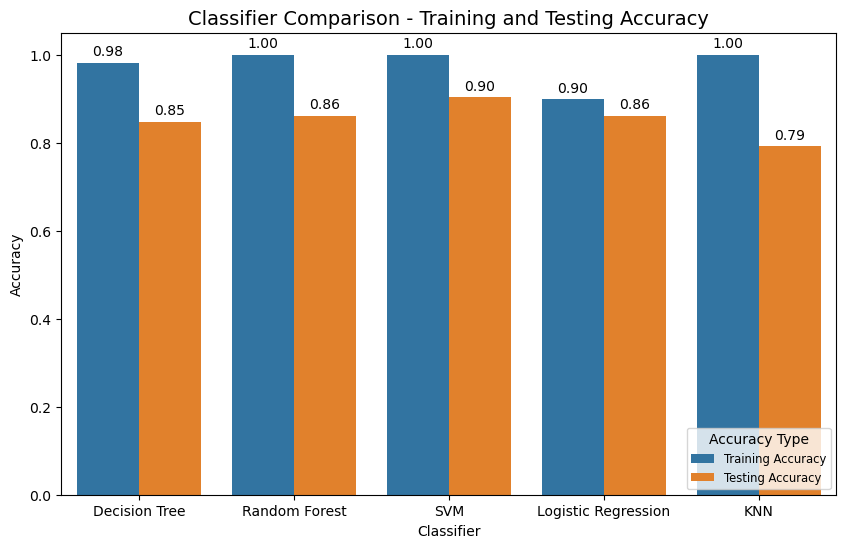

In [250]:

# Reshape the data to a long format (for seaborn bar plot)
df_melted = df.melt(id_vars='Classifier', var_name='Accuracy Type', value_name='Accuracy')

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a seaborn bar plot
ax = sns.barplot(x='Classifier', y='Accuracy', hue='Accuracy Type', data=df_melted)

# Customize the appearance
plt.title('Classifier Comparison - Training and Testing Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)  # Accuracy values between 0 and 1
plt.legend(title='Accuracy Type', loc='lower right', fontsize='small', markerscale=0.8)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)